# Just Plotting Machine

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.metrics import r2_score

## Comparison of KLD between UIRT and Ising-MIRT

In [2]:
# 각 데이터 추출
UIRT_pd = pd.read_csv("0606_(no)w_KLDs.csv")
MIRT_pd = pd.read_csv("0424_Q_KLDs.csv")

UIRT_np_multi = UIRT_pd.to_numpy()
UIRT_np = UIRT_np_multi[:, 1] / 40586
MIRT_np_multi = MIRT_pd.to_numpy()
MIRT_np = MIRT_np_multi[:, 1] / 40586

In [3]:
# x축 임의 생성
x_axisU = np.arange(UIRT_np.shape[0])
x_axisM = np.arange(MIRT_np.shape[0])

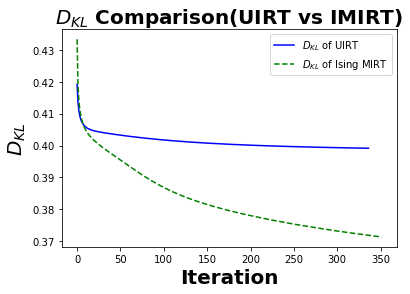

In [4]:
# Plotting Trial

x1 = x_axisU    # Theta Column
x2 = x_axisM

ys = UIRT_np    # CM411Q02S Column
#print(ys)
zs = MIRT_np   # CM411Q02S Real df Column

plt.plot(x1, ys, "b-", label='$D_{KL}$ of UIRT')
plt.plot(x2, zs, "g--", label='$D_{KL}$ of Ising MIRT')

plt.title('$D_{KL}$ Comparison(UIRT vs IMIRT)', fontdict={'weight': 'bold', 'size': 20})
plt.xlabel('Iteration', fontdict={'weight': 'bold', 'size': 20})
plt.ylabel('$D_{KL}$', fontdict={'weight': 'bold', 'size': 20})
plt.legend(loc='upper right')
plt.show()

## Plotting $D_{KL}$ (Train vs Test) of UIRT(0629) reSampling

In [69]:
# Plotting Trend Comparison: Train vs Test of UIRT

y_train_pd_ini = pd.read_csv("UIRT1_KLDs_train_0629.csv")
y_test_pd_ini = pd.read_csv("UIRT1_KLDs_test_0629.csv")

In [70]:
y_train_1st_bf = y_train_pd_ini.to_numpy()
y_train_1st = y_train_1st_bf[:, 1] / 36566
y_test_1st_bf = y_test_pd_ini.to_numpy()
y_test_1st = y_test_1st_bf[:, 1] / 4020

x_train_1st = np.arange(y_train_1st.shape[0])
x_test_1st = np.arange(y_test_1st.shape[0])

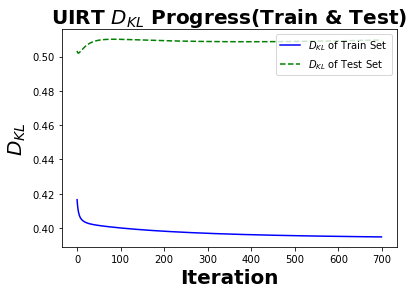

In [71]:
# Plotting Trial

plt.plot(x_train_1st, y_train_1st, "b-", label='$D_{KL}$ of Train Set')
plt.plot(x_test_1st, y_test_1st, "g--", label='$D_{KL}$ of Test Set')

plt.title("UIRT $D_{KL}$ Progress(Train & Test)", fontdict={'weight': 'bold', 'size': 20})
plt.xlabel('Iteration', fontdict={'weight': 'bold', 'size': 20})
plt.ylabel('$D_{KL}$', fontdict={'weight': 'bold', 'size': 20})
plt.legend(loc='upper right')
plt.show()

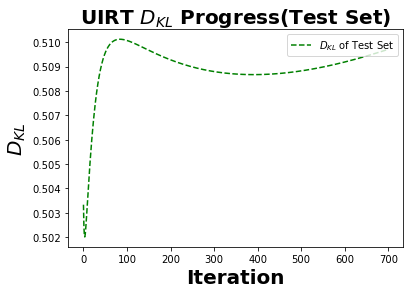

In [72]:
# Plotting Trial
y_test_2nd = y_test_1st

plt.plot(x_test_1st, y_test_2nd, "g--", label='$D_{KL}$ of Test Set')

plt.title("UIRT $D_{KL}$ Progress(Test Set)", fontdict={'weight': 'bold', 'size': 20})
plt.xlabel('Iteration', fontdict={'weight': 'bold', 'size': 20})
plt.ylabel('$D_{KL}$', fontdict={'weight': 'bold', 'size': 20})
plt.legend(loc='upper right')
plt.show()

## Plotting KLD (Train vs Test) of UIRT(0628) reSampling

In [75]:
# Plotting Mass Production of UIRT  -> 출근하자마자 바로 UIRT KLD 그래프 여러개 띄워놓기 (3x3)
num_pyobon = 9
num_save = 1
pyobon_basket = []

num_tests = [4020, 4028, 4032, 4037, 4031, 4016, 4024, 4028, 4024, 4029]
num_trains = [36566, 36558, 36554, 36549, 36555, 36570, 36562, 36558, 36562, 36557]

for su in range(num_pyobon):
    denomin_train = num_trains[num_save]
    denomin_test = num_tests[num_save]
    
    num_save+=1
    pyobon_carrier = []
    
    ypyo_train_pd = pd.read_csv("UIRT{0}_KLDs_0.1train_0629.csv".format(num_save))
    ypyo_test_pd = pd.read_csv("UIRT{0}_KLDs_0.1test_0629.csv".format(num_save))
    
    ypyo_train_bf = ypyo_train_pd.to_numpy()
    ypyo_train = ypyo_train_bf[:, 1] / denomin_train
    ypyo_test_bf = ypyo_test_pd.to_numpy()
    ypyo_test = ypyo_test_bf[:, 1] / denomin_test

    xpyo_train = np.arange(ypyo_train.shape[0])
    xpyo_test = np.arange(ypyo_test.shape[0])
    
    pyobon_carrier.append(xpyo_train)
    pyobon_carrier.append(xpyo_test)
    pyobon_carrier.append(ypyo_train)
    pyobon_carrier.append(ypyo_test)
    
    pyobon_basket.append(pyobon_carrier)


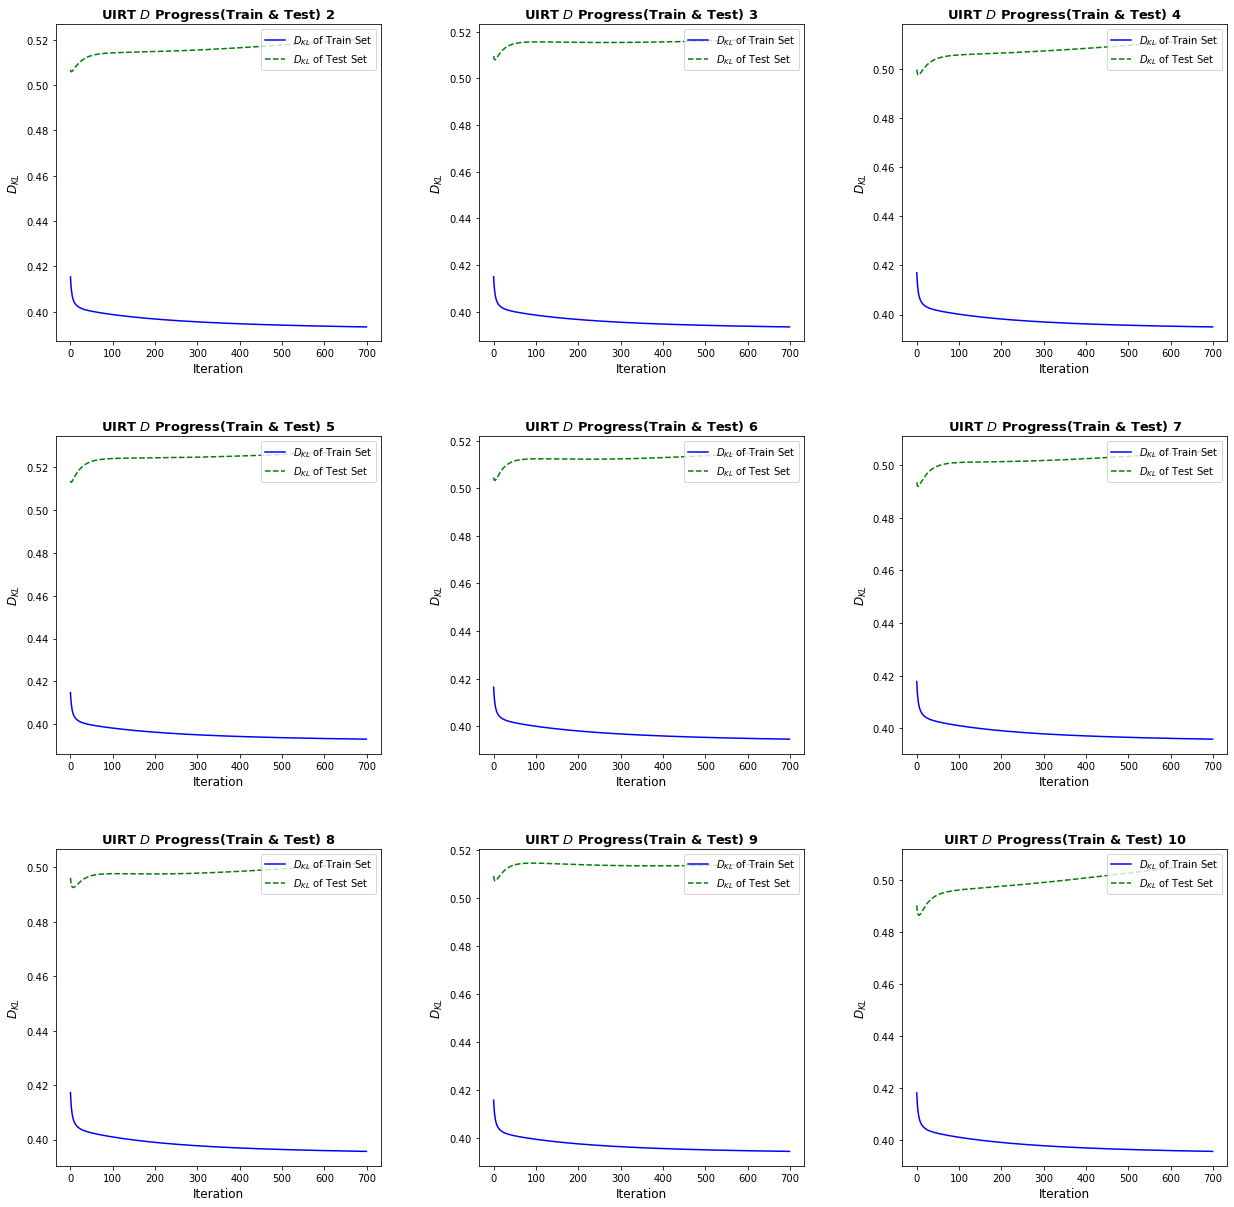

In [76]:
# 최종 plotting 결과를 격자 방식으로 나열
f, axes = plt.subplots(3, 3)
garo = 0
sero = 0
rank = 0

# 격자 크기 설정
f.set_size_inches((21, 21))

# 격자 여백 설정
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
num_ready = 1

for slot in pyobon_basket:
    
    order = 0
    num_ready+=1
        
    x = slot[0]
    y = slot[2]

    x_artificial = slot[1]
    y_artificial = slot[3]
        
    axes[garo, sero].plot(x, y, "b-", label='$D_{KL}$ of Train Set')
    axes[garo, sero].plot(x_artificial, y_artificial, "g--", label='$D_{KL}$ of Test Set')
        
    axes[garo, sero].set_title("UIRT $D$ Progress(Train & Test) {0}".format(num_ready), fontdict={'weight': 'bold', 'size': 13})
    axes[garo, sero].set_xlabel("Iteration", fontdict={'size': 12})
    axes[garo, sero].set_ylabel('$D_{KL}$', fontdict={'weight': 'bold', 'size': 12})

    axes[garo, sero].legend(loc='upper right')

    sero += 1
    garo += sero // 3    # 오른쪽으로 한 칸씩 전진, 한 줄에 4개 모두 다 차면 줄 바꾸기 (숫자 범위: 0~3)
    sero = sero % 3      # 가로 4줄 모두 다 차면 Plot할 줄 바꾸기 (index 나누기 4의 몫에 해당)

    order+=1
        
plt.show()

## Plotting $D_{KL}$ (Train vs Test) of MIRT(0703) reSampling

In [19]:
# Plotting Trend Comparison: Train vs Test of UIRT

y_train_pd_ini = pd.read_csv("MIRT1_KLDs_50_0.1train_0704.csv")
y_test_pd_ini = pd.read_csv("MIRT1_KLDs_50_0.1test_0704.csv")

In [20]:
y_train_1st_bf = y_train_pd_ini.to_numpy()
y_train_1st = y_train_1st_bf[:, 1] / 36566
y_test_1st_bf = y_test_pd_ini.to_numpy()
y_test_1st = y_test_1st_bf[:, 1] / 4020

x_train_1st = np.arange(y_train_1st.shape[0])
x_test_1st = np.arange(y_test_1st.shape[0])

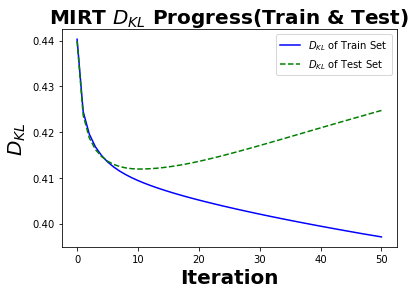

In [21]:
# Plotting Trial(test)

plt.plot(x_train_1st, y_train_1st, "b-", label='$D_{KL}$ of Train Set')
plt.plot(x_test_1st, y_test_1st, "g--", label='$D_{KL}$ of Test Set')

plt.title("MIRT $D_{KL}$ Progress(Train & Test)", fontdict={'weight': 'bold', 'size': 20})
plt.xlabel('Iteration', fontdict={'weight': 'bold', 'size': 20})
plt.ylabel('$D_{KL}$', fontdict={'weight': 'bold', 'size': 20})
plt.legend(loc='upper right')
plt.show()

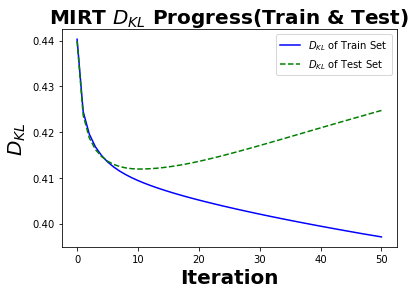

In [97]:
# Plotting Trial

plt.plot(x_train_1st, y_train_1st, "b-", label='$D_{KL}$ of Train Set')
plt.plot(x_test_1st, y_test_1st, "g--", label='$D_{KL}$ of Test Set')

plt.title("MIRT $D_{KL}$ Progress(Train & Test)", fontdict={'weight': 'bold', 'size': 20})
plt.xlabel('Iteration', fontdict={'weight': 'bold', 'size': 20})
plt.ylabel('$D_{KL}$', fontdict={'weight': 'bold', 'size': 20})
plt.legend(loc='upper right')
plt.show()

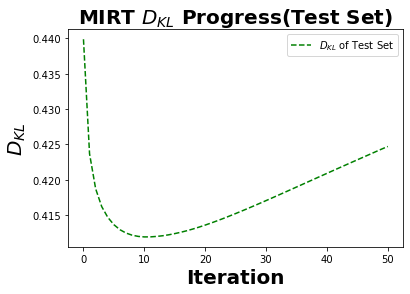

In [98]:
# Plotting Trial
y_test_2nd = y_test_1st

plt.plot(x_test_1st, y_test_2nd, "g--", label='$D_{KL}$ of Test Set')

plt.title("MIRT $D_{KL}$ Progress(Test Set)", fontdict={'weight': 'bold', 'size': 20})
plt.xlabel('Iteration', fontdict={'weight': 'bold', 'size': 20})
plt.ylabel('$D_{KL}$', fontdict={'weight': 'bold', 'size': 20})
plt.legend(loc='upper right')
plt.show()

## Plotting KLD (Train vs Test) of MIRT(0630) reSampling

In [99]:
# Plotting Mass Production of UIRT  -> 출근하자마자 바로 UIRT KLD 그래프 여러개 띄워놓기 (3x3)
num_pyobon = 9
num_save = 1
pyobon_basket = []

num_tests = [4020, 4028, 4032, 4037, 4031, 4016, 4024, 4028, 4024, 4029]
num_trains = [36566, 36558, 36554, 36549, 36555, 36570, 36562, 36558, 36562, 36557]

for su in range(num_pyobon):
    denomin_train = num_trains[num_save]
    denomin_test = num_tests[num_save]
    
    num_save+=1
    pyobon_carrier = []
    
    ypyo_train_pd = pd.read_csv("MIRT{0}_KLDs_50_0.1train_0704.csv".format(num_save))
    ypyo_test_pd = pd.read_csv("MIRT{0}_KLDs_50_0.1test_0704.csv".format(num_save))
    
    ypyo_train_bf = ypyo_train_pd.to_numpy()
    ypyo_train = ypyo_train_bf[:, 1] / denomin_train
    ypyo_test_bf = ypyo_test_pd.to_numpy()
    ypyo_test = ypyo_test_bf[:, 1] / denomin_test

    xpyo_train = np.arange(ypyo_train.shape[0])
    xpyo_test = np.arange(ypyo_test.shape[0])
    
    pyobon_carrier.append(xpyo_train)
    pyobon_carrier.append(xpyo_test)
    pyobon_carrier.append(ypyo_train)
    pyobon_carrier.append(ypyo_test)
    
    pyobon_basket.append(pyobon_carrier)


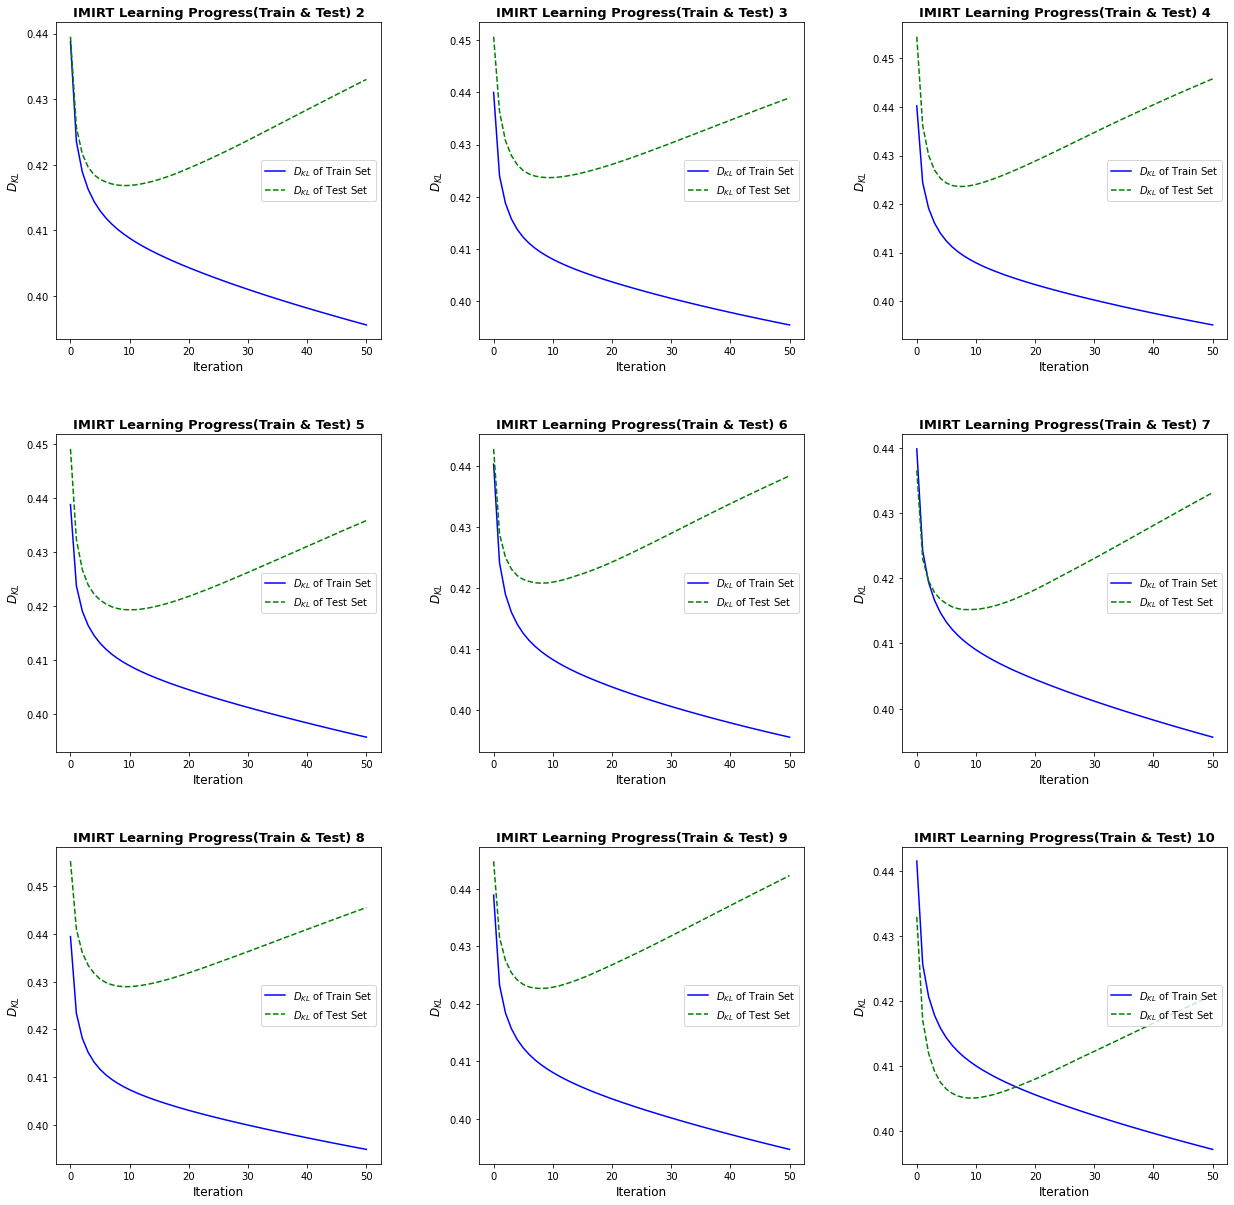

In [106]:
# 최종 plotting 결과를 격자 방식으로 나열
f, axes = plt.subplots(3, 3)
garo = 0
sero = 0
rank = 0

# 격자 크기 설정
f.set_size_inches((21, 21))

# 격자 여백 설정
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
num_ready = 1

for slot in pyobon_basket:
    
    order = 0
    num_ready+=1
        
    x = slot[0]
    y = slot[2]

    x_artificial = slot[1]
    y_artificial = slot[3]
        
    axes[garo, sero].plot(x, y, "b-", label='$D_{KL}$ of Train Set')
    axes[garo, sero].plot(x_artificial, y_artificial, "g--", label='$D_{KL}$ of Test Set')
        
    axes[garo, sero].set_title("IMIRT Learning Progress(Train & Test) {0}".format(num_ready), fontdict={'weight': 'bold', 'size': 13})
    axes[garo, sero].set_xlabel("Iteration", fontdict={'size': 12})
    axes[garo, sero].set_ylabel('$D_{KL}$', fontdict={'weight': 'bold', 'size': 12})

    axes[garo, sero].legend(loc='right')

    sero += 1
    garo += sero // 3    # 오른쪽으로 한 칸씩 전진, 한 줄에 4개 모두 다 차면 줄 바꾸기 (숫자 범위: 0~3)
    sero = sero % 3      # 가로 4줄 모두 다 차면 Plot할 줄 바꾸기 (index 나누기 4의 몫에 해당)

    order+=1
        
plt.show()

## Relation between $Q_{ij}$ and $E[Y_{i}Y_{j}]$

### 2D Distribution Sorting

In [3]:
Q_summon = pd.read_csv("IMIRT_fin_Q_0703.csv")
Eij_summon = pd.read_csv("Eij_dist_0404.csv")

In [4]:
Q_summ_np_bf = Q_summon.to_numpy()
Q_summ_np = Q_summ_np_bf[:, 1:]
Eij_fna = Eij_summon.fillna(0)             # 결측치를 모조리 0으로 처리
Eij_summ_np_bf = Eij_fna.to_numpy()
Eij_summ_np = Eij_summ_np_bf[:, 1:]

In [87]:
Q_summ_np_bfre = Q_sumre.to_numpy()
Q_summ_np_RE = Q_summ_np_bfre[:, 1:]

In [5]:
EJjM = Q_summ_np * Eij_summ_np

In [16]:
print(EJjM)

[[ 0.          0.16682822  0.31483187 ...  0.13756459 -0.11195277
   0.05059803]
 [ 0.16682822  0.         -0.66921453 ...  0.13894167 -0.13214282
   0.04050931]
 [ 0.31483187 -0.66921453  0.         ...  0.13667915 -0.08029424
   0.06147285]
 ...
 [ 0.13756459  0.13894167  0.13667915 ...  0.         -0.00531428
  -0.0063495 ]
 [-0.11195277 -0.13214282 -0.08029424 ... -0.00531428  0.
   0.0885157 ]
 [ 0.05059803  0.04050931  0.06147285 ... -0.0063495   0.0885157
   0.        ]]


In [18]:
print(np.max(Q_summ_np))
print(np.min(Q_summ_np))

6.668420789695649
-2.8521220770410345


In [20]:
print(np.max(Eij_summ_np))
print(np.min(Eij_summ_np))

0.376961538461537
-0.3492621546961313


In [6]:
print(np.max(EJjM))
print(np.min(EJjM))

1.94513053273974
-0.9586820900986532


### Heatmap Plotting

In [84]:
%matplotlib inline
import seaborn as sns    

<AxesSubplot:>

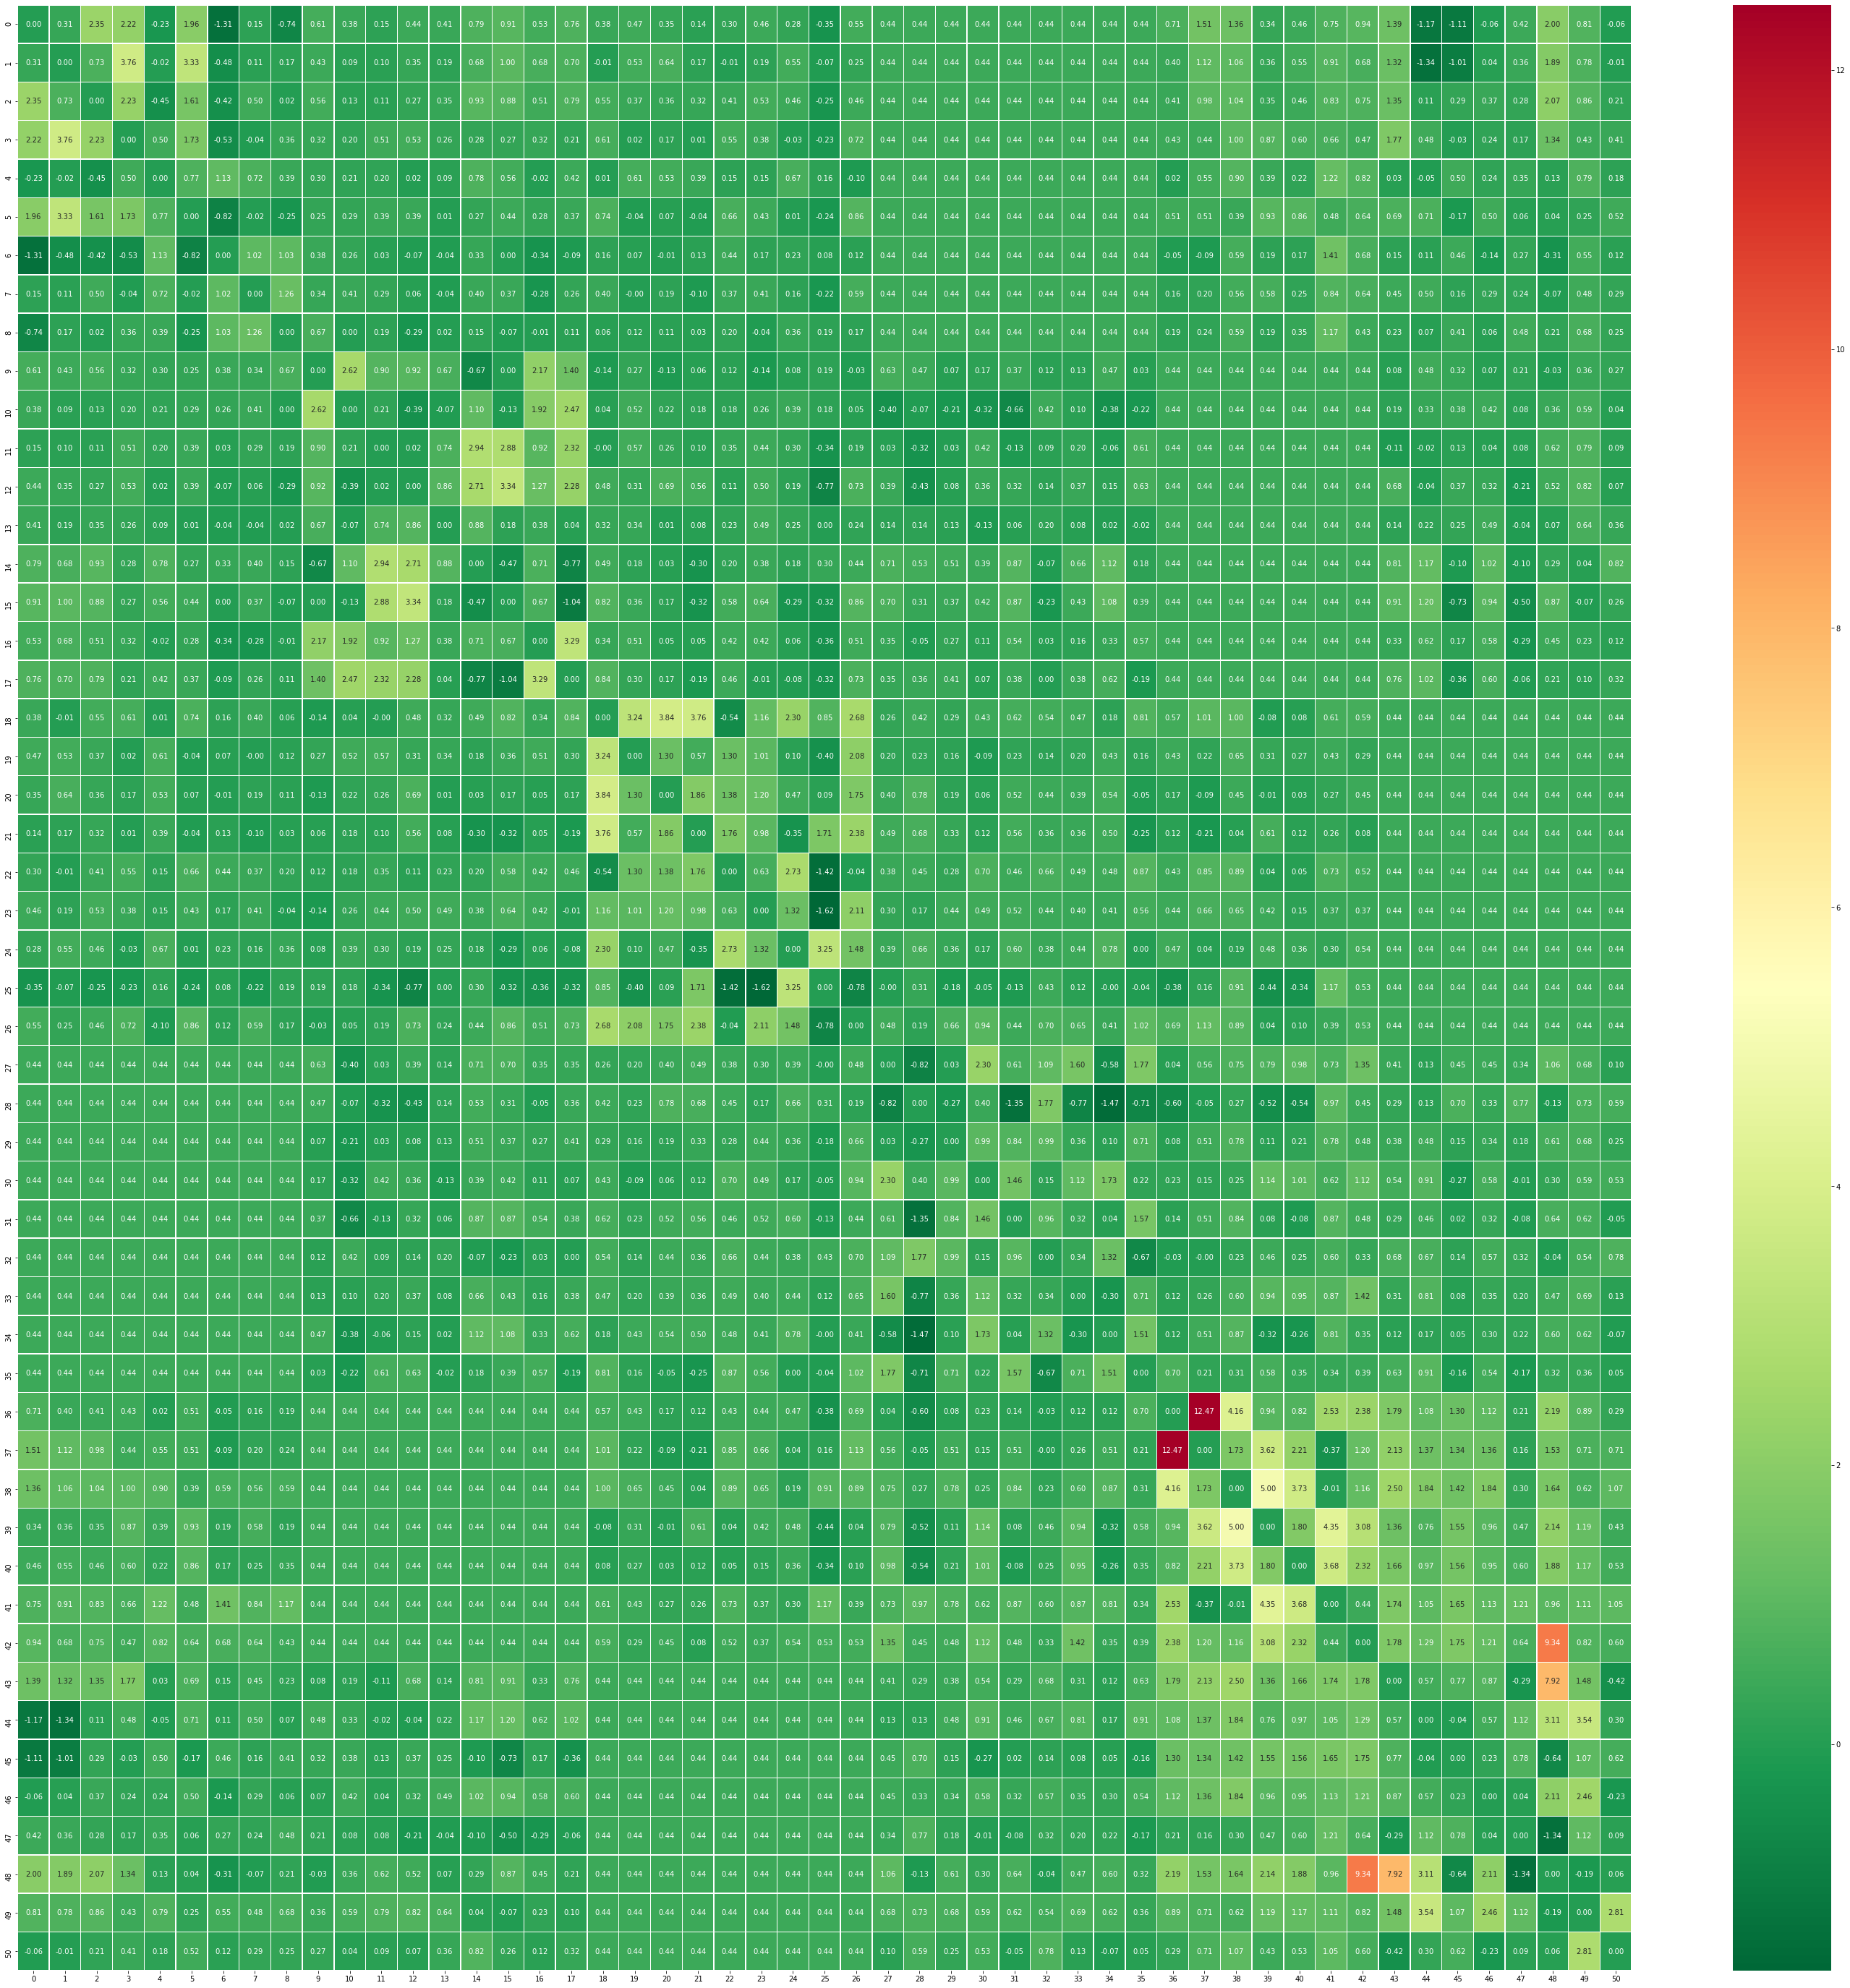

In [88]:
plt.figure(figsize=(50,50))
sns.heatmap(data = Q_summ_np_RE, annot=True,
fmt = '.2f', linewidths=.5, cmap='RdYlGn_r')

<AxesSubplot:>

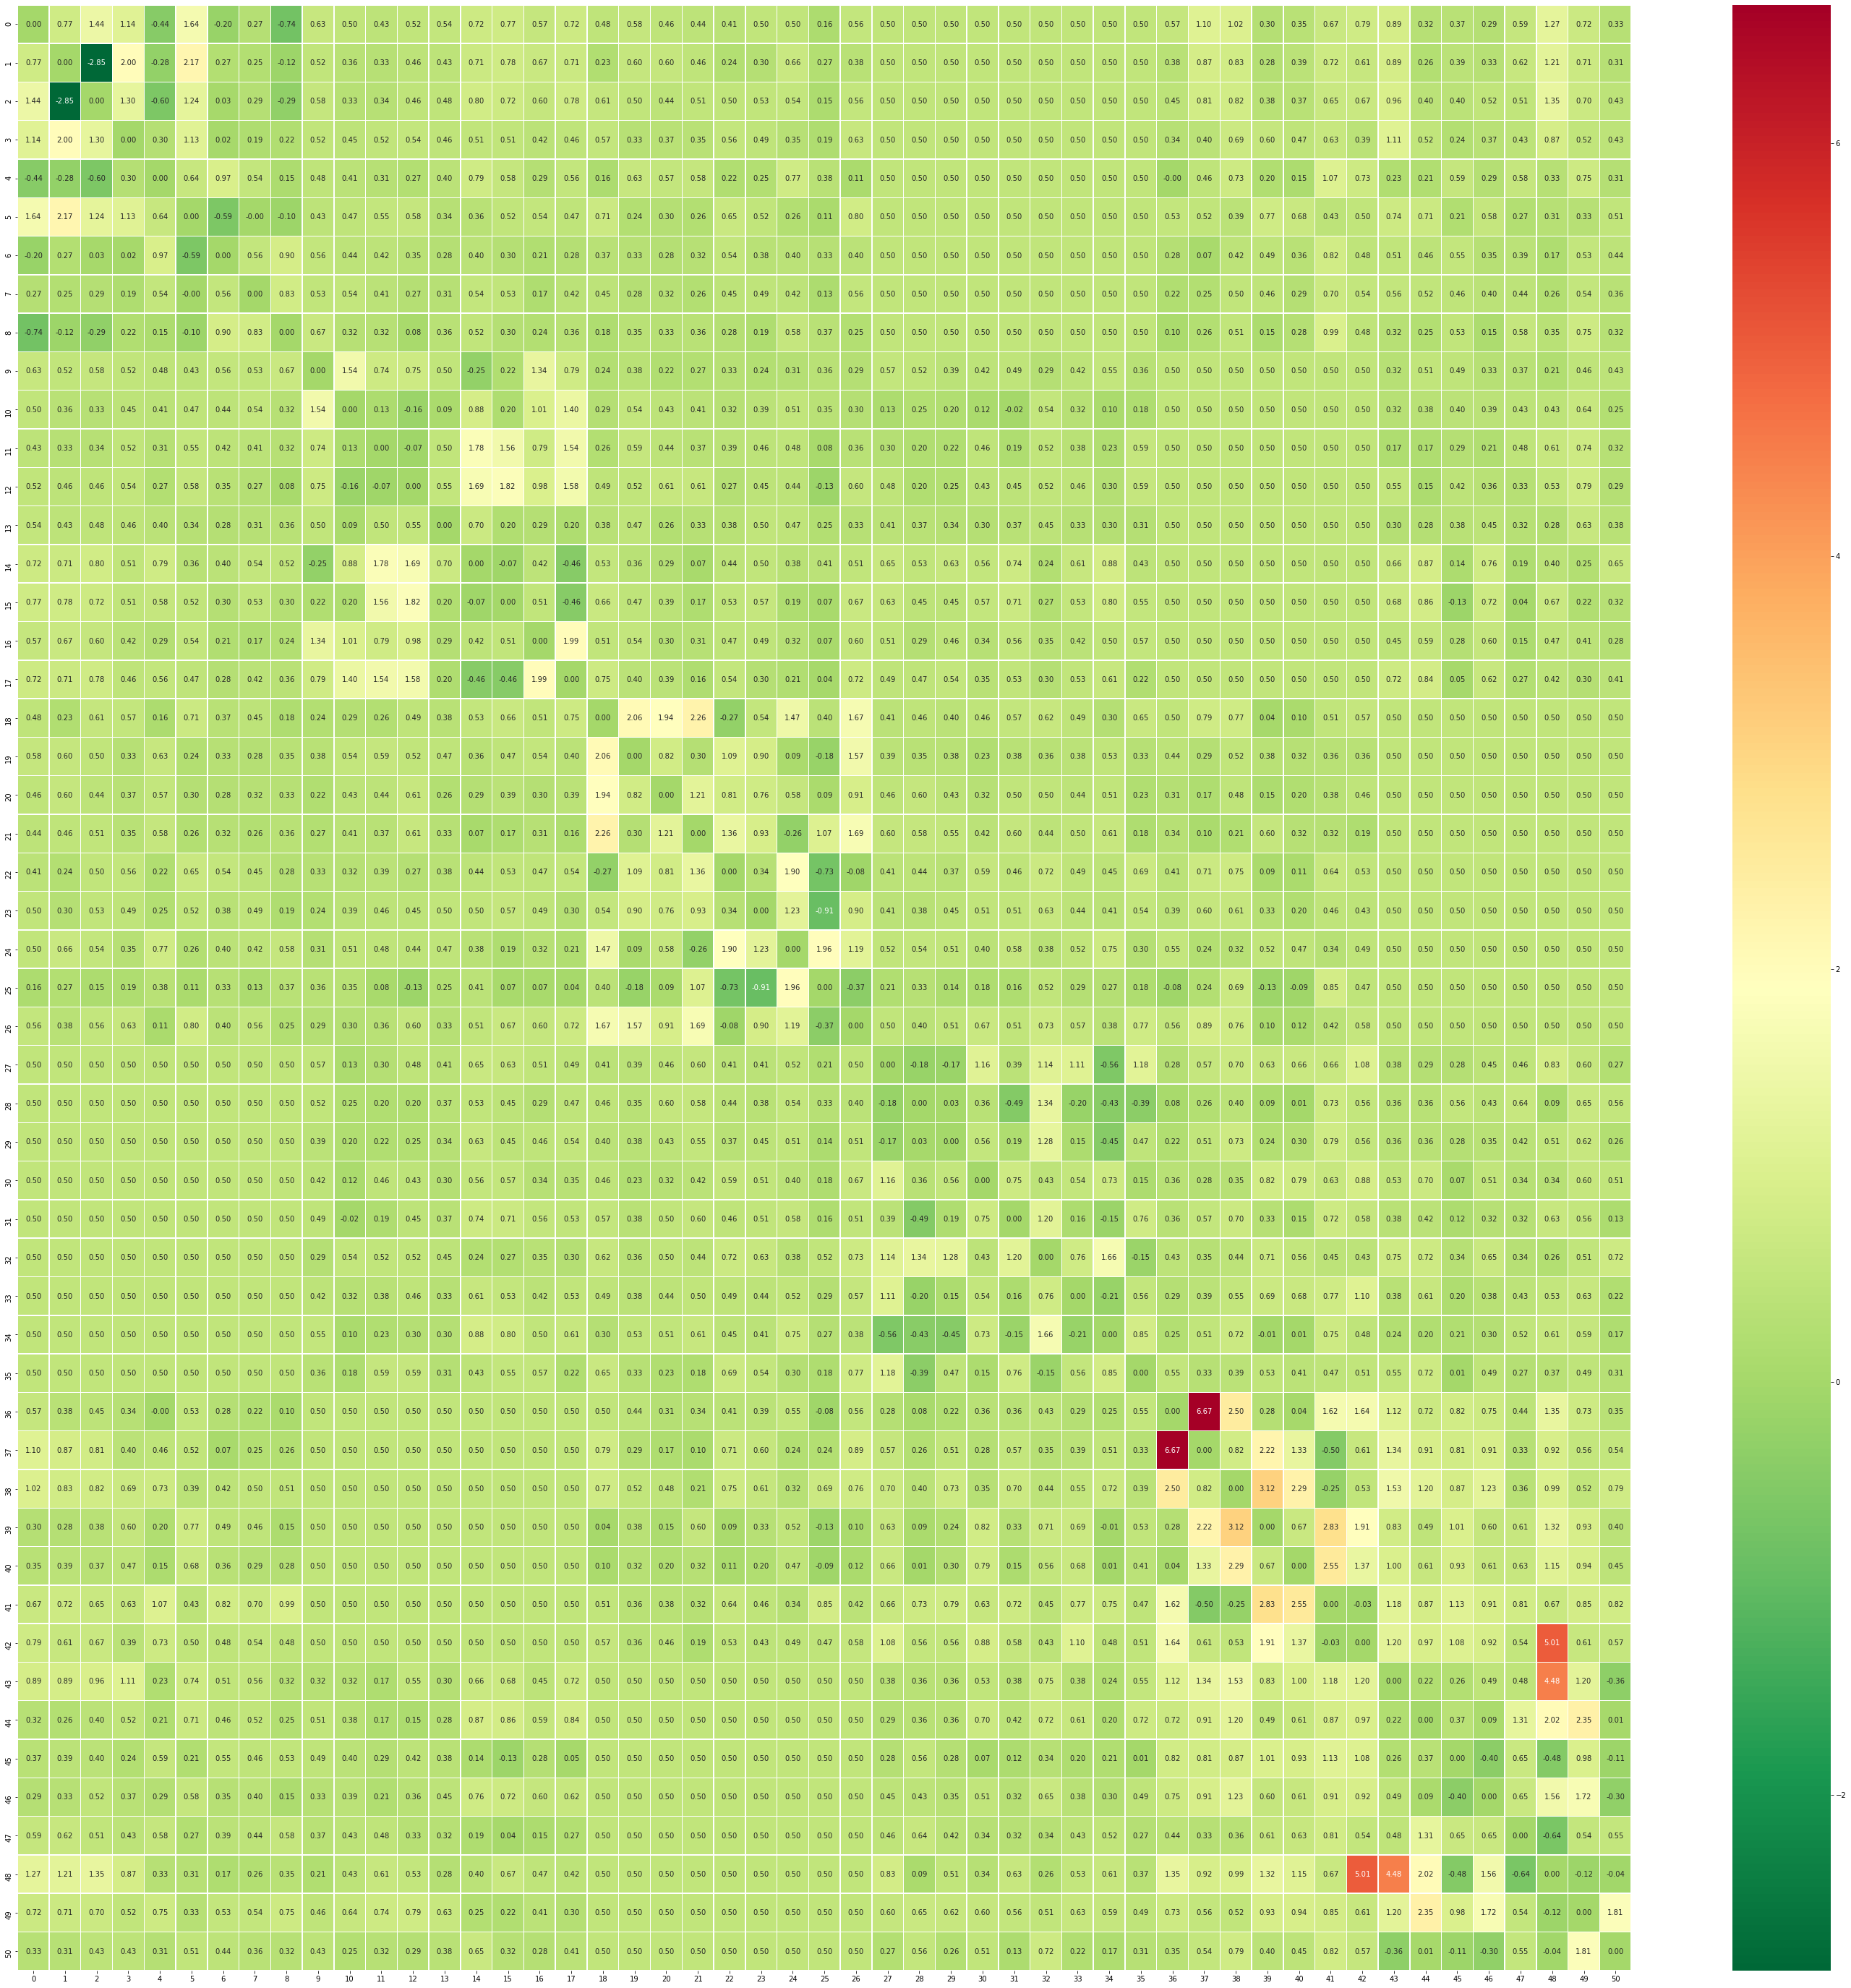

In [23]:
plt.figure(figsize=(50,50))
sns.heatmap(data = Q_summ_np, annot=True,
fmt = '.2f', linewidths=.5, cmap='RdYlGn_r')

<AxesSubplot:>

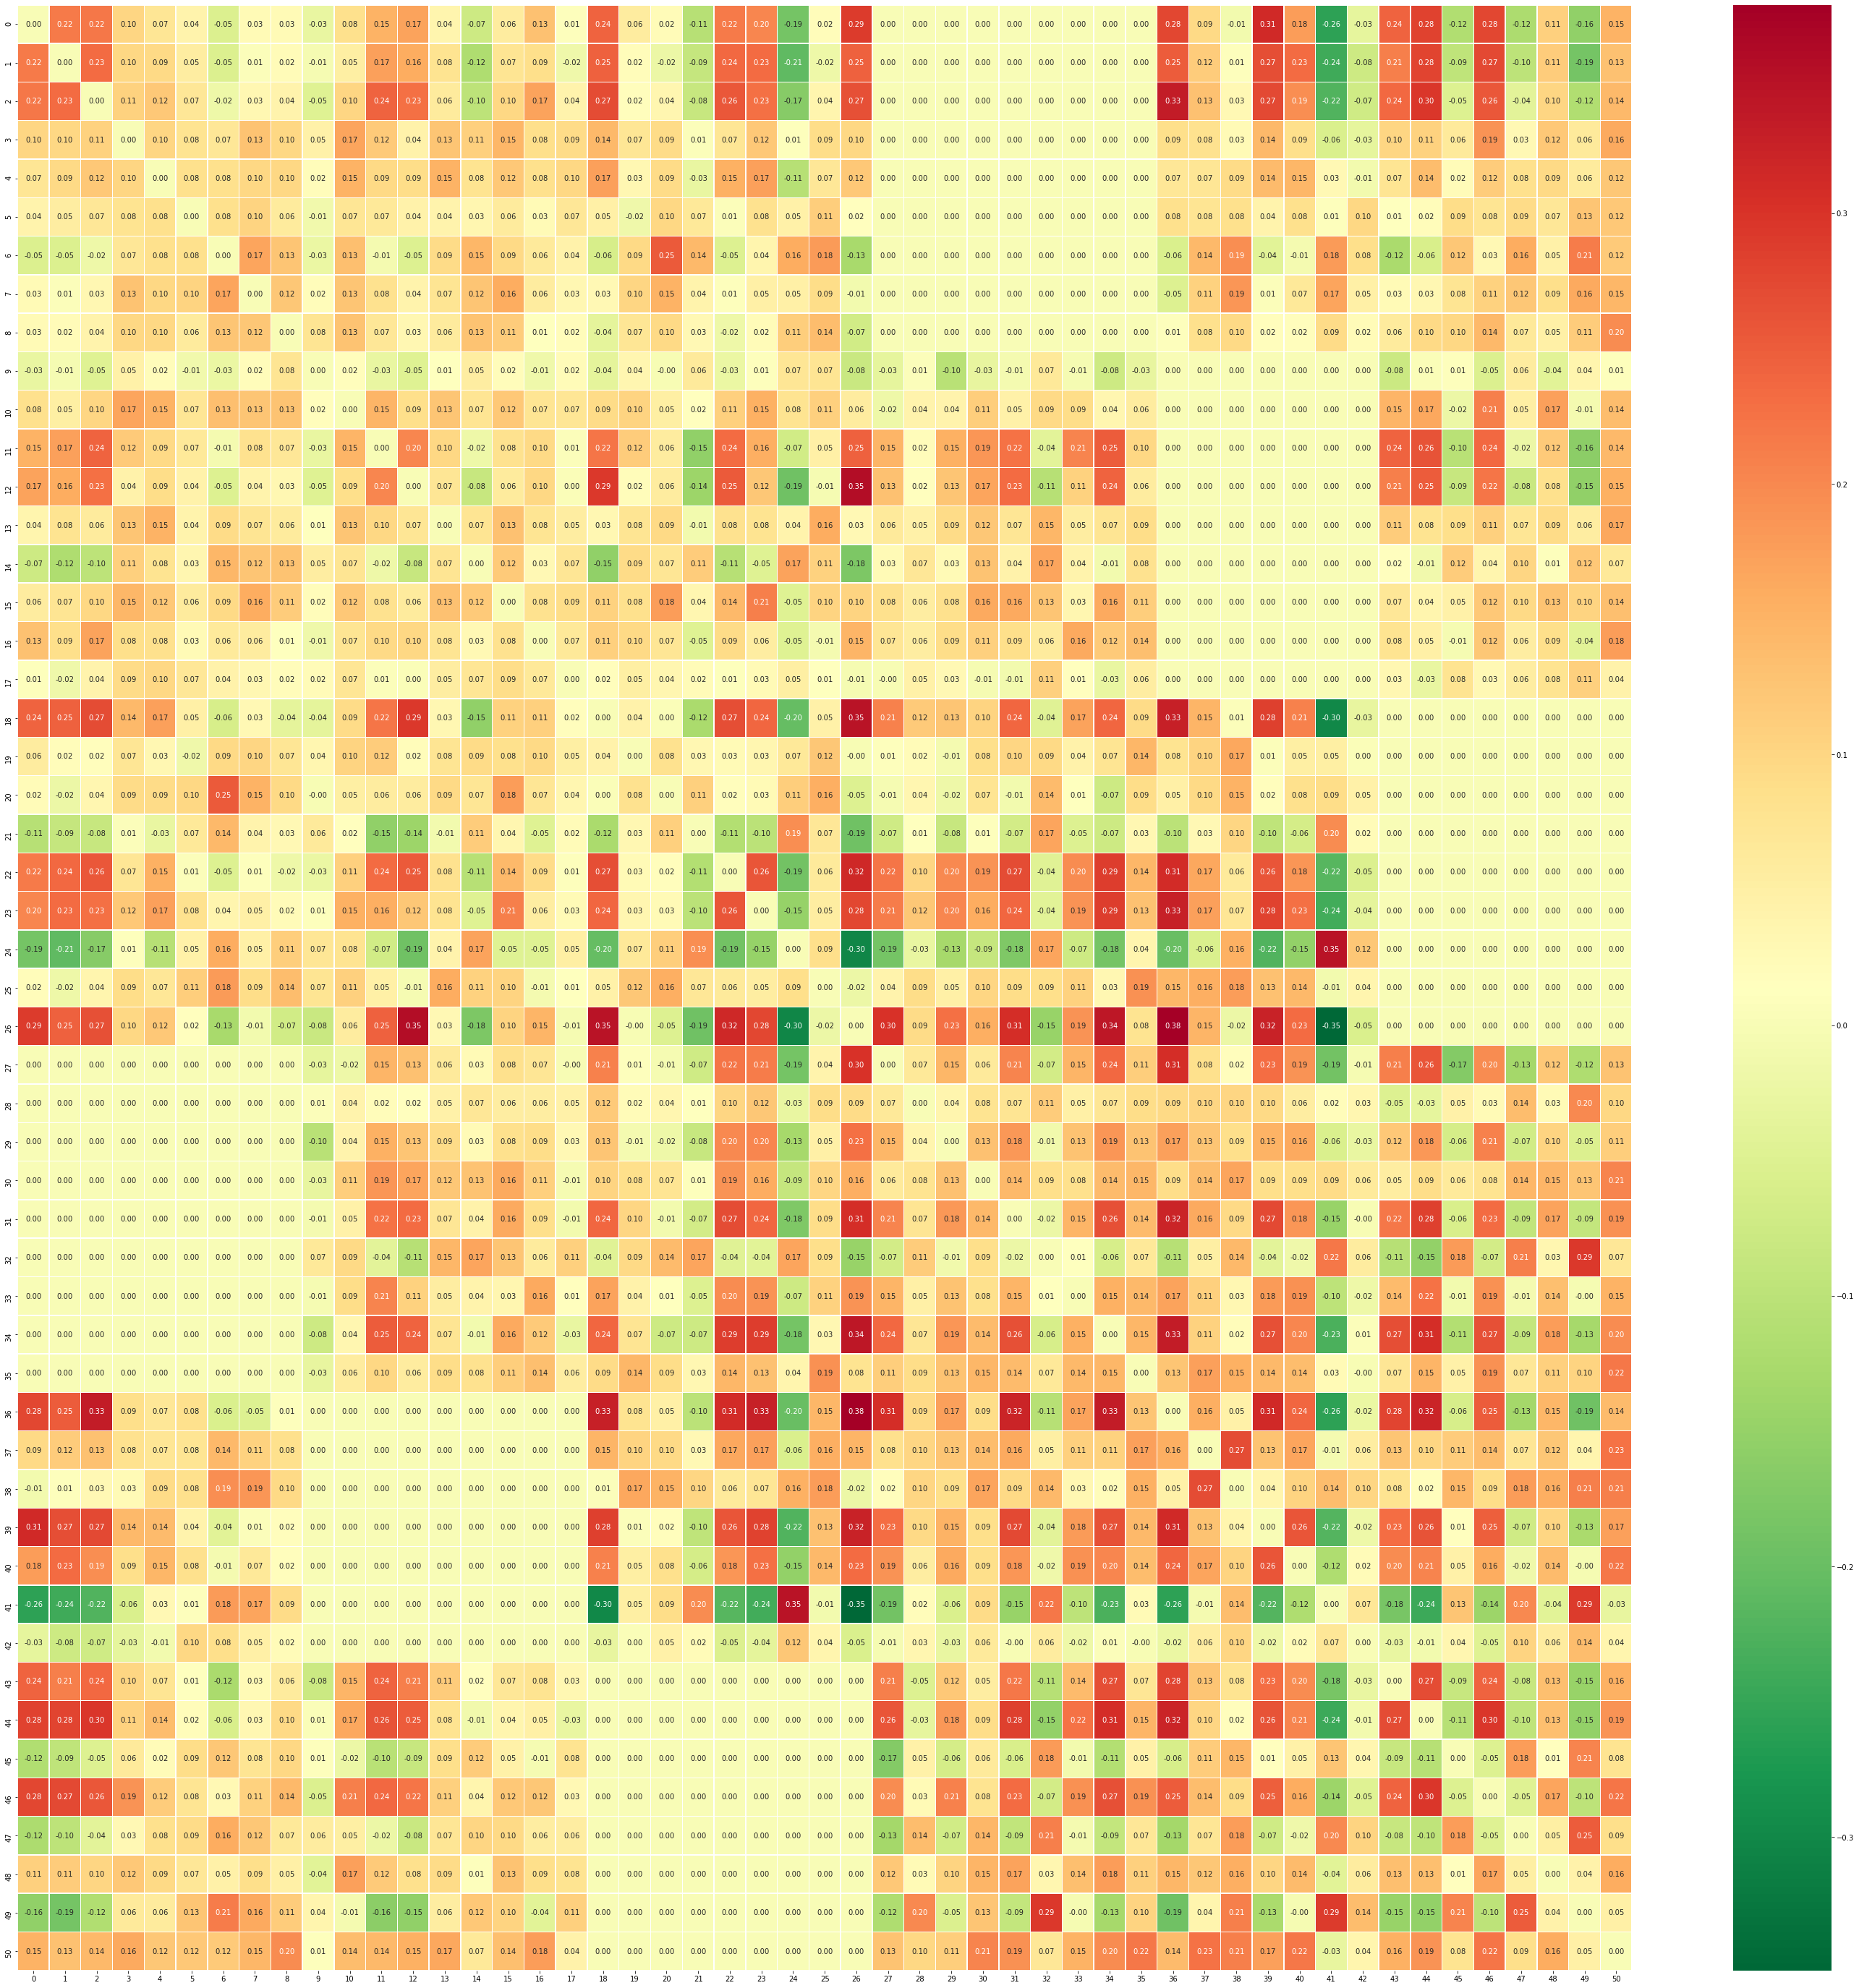

In [24]:
plt.figure(figsize=(50,50))
sns.heatmap(data = Eij_summ_np, annot=True, 
fmt = '.2f', linewidths=.5, cmap='RdYlGn_r')

<AxesSubplot:>

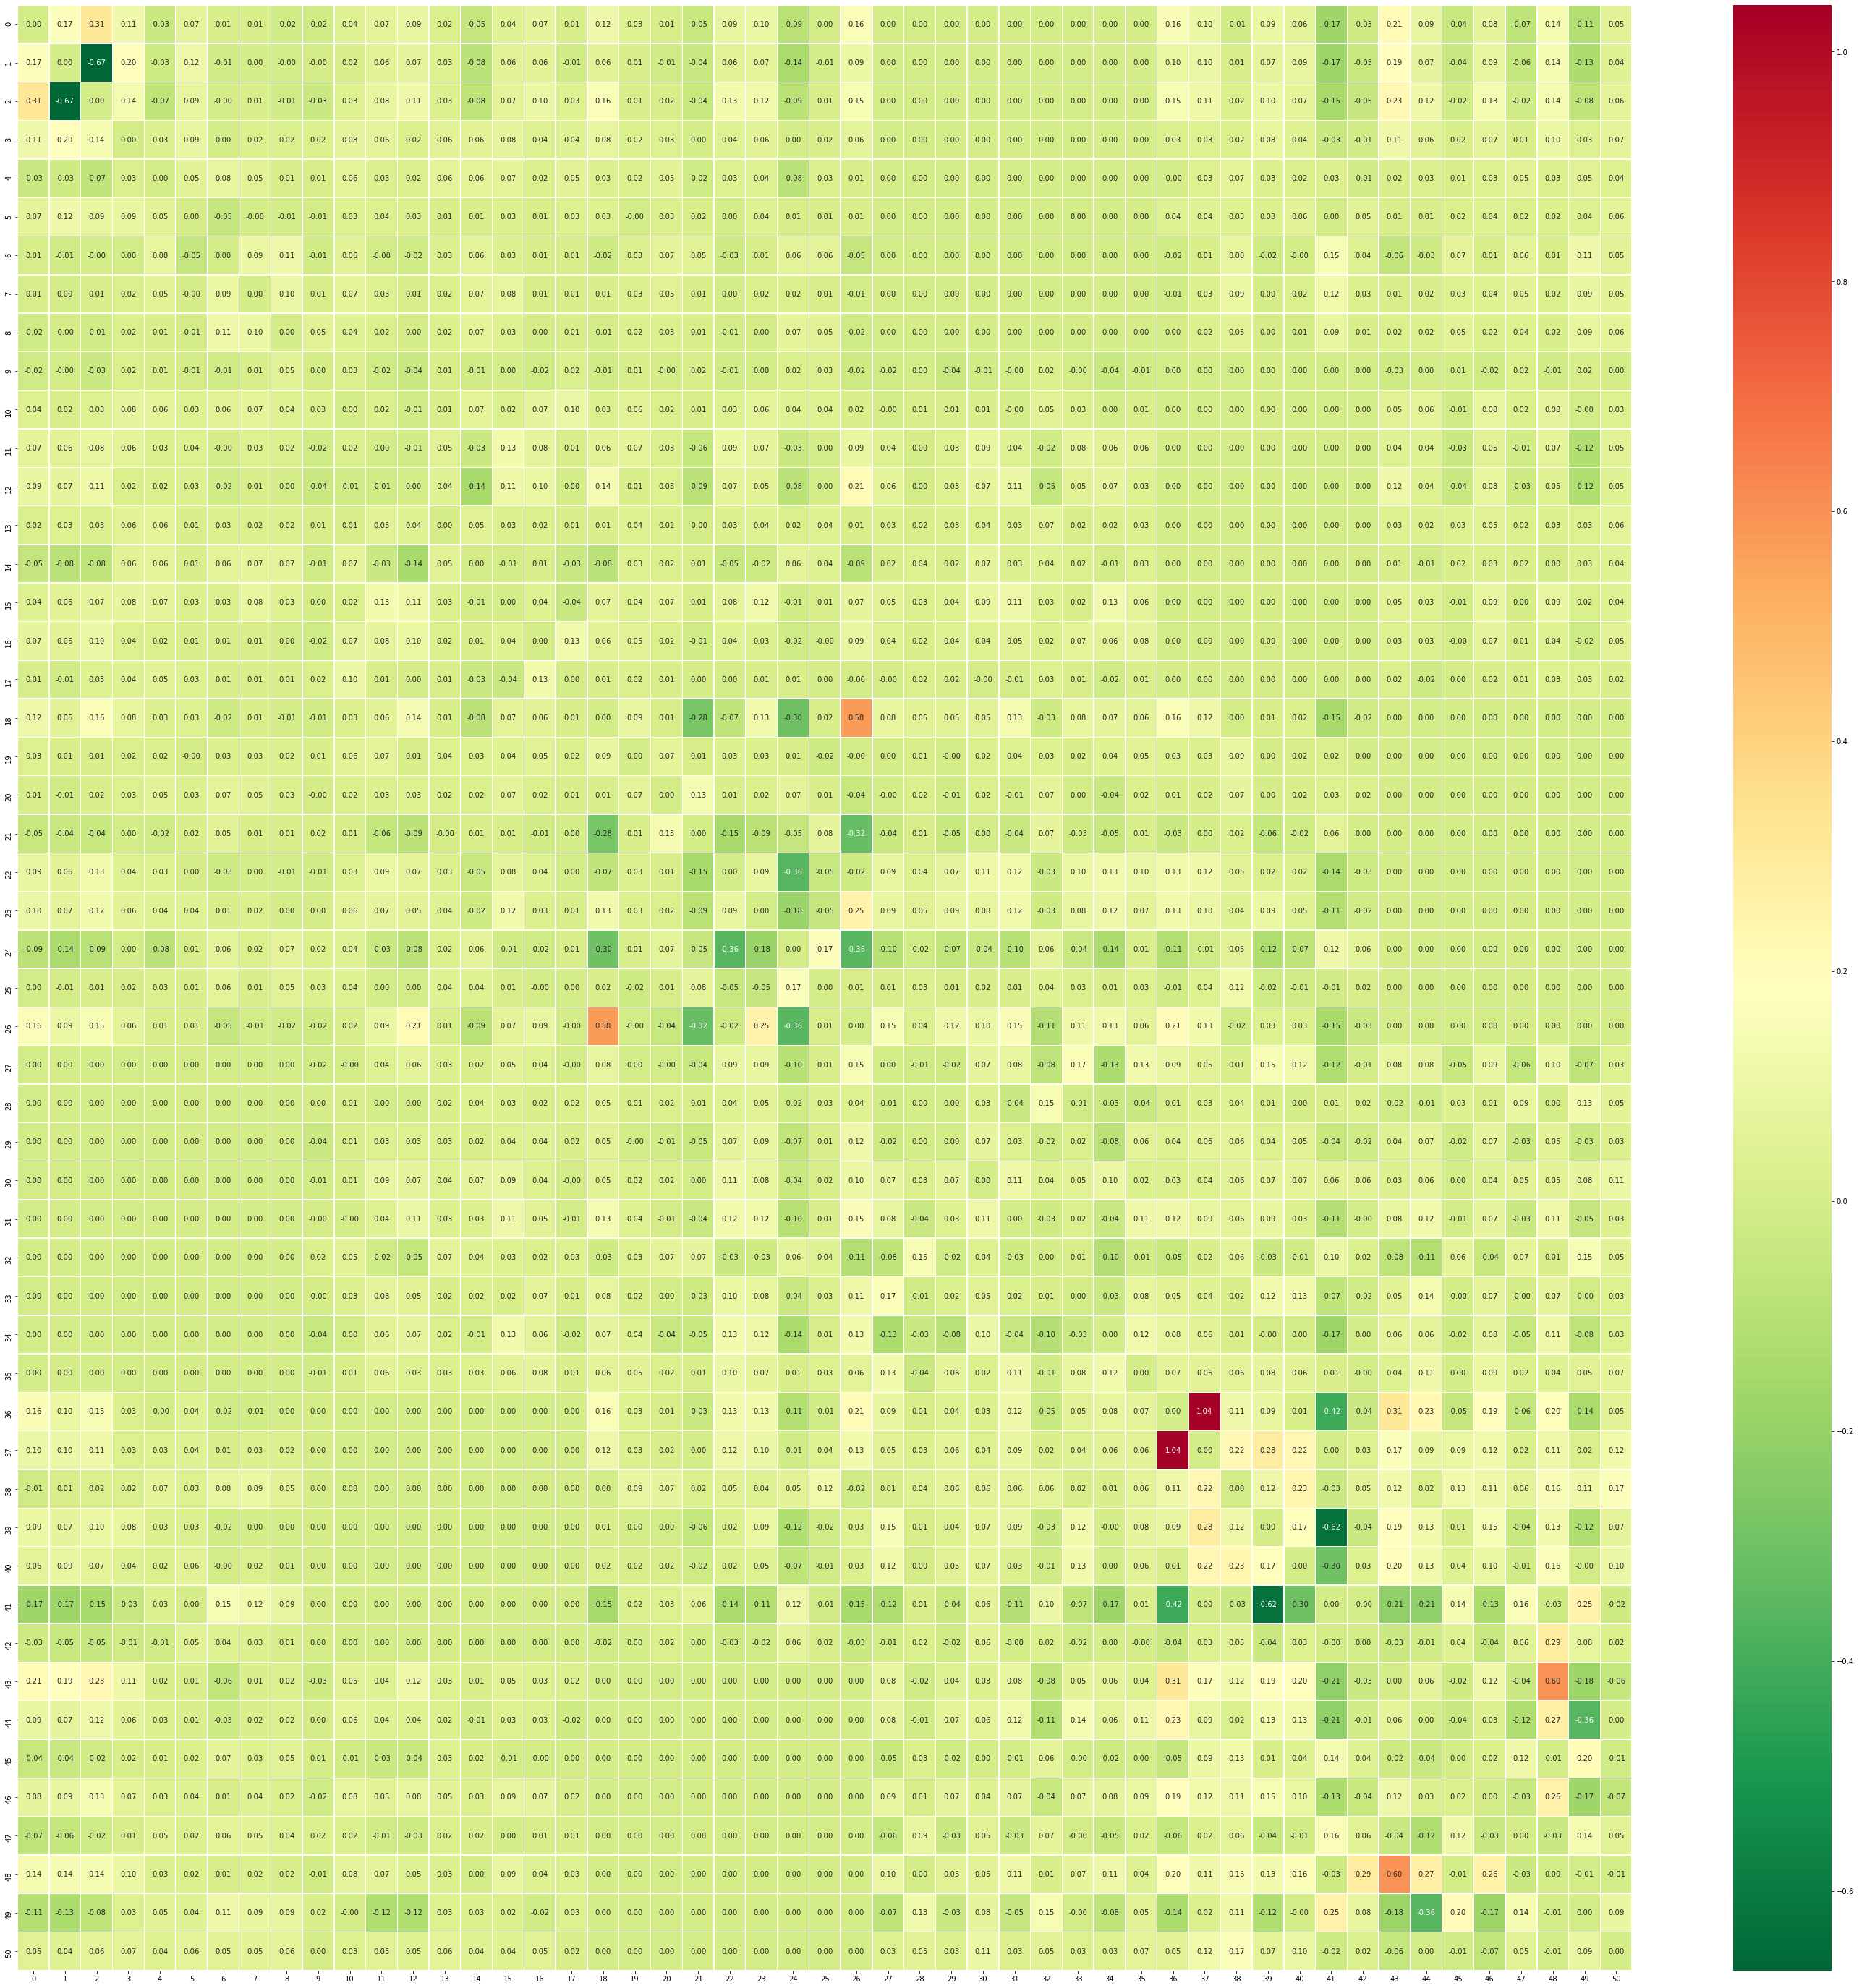

In [25]:
plt.figure(figsize=(50,50))
sns.heatmap(data = EJjM, annot=True,
fmt = '.2f', linewidths=.5, cmap='RdYlGn_r')